<a href="https://colab.research.google.com/github/debanandasen/Tensorflow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with Tensorflow
A few types classification problems:
  * Binary Classification
  * Multiclass Classification
  * Multilabel Classification

## Creating data to Model & Fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)



In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


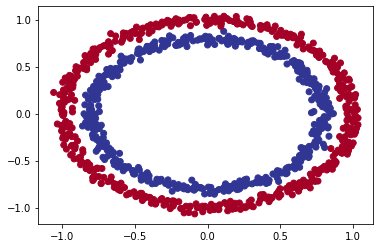

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import tensorflow as tf
# set he random seed
tf.random.set_seed(42)

#1 Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the Model

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
                )

#3. Fit the Model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.9644 - accuracy: 0.4650
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7233 - accuracy: 0.4640
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1973 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 2.0682 - accuracy: 0.4870
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7422 - accuracy: 0.4900


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X,y, epochs=100, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy , So let's use more layers

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

In [ ]:
# EValuate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.693270742893219, 0.5]

## Improving our Model

In [ ]:
# set the random seed
tf.random.set_seed(42)

#1 Create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model

model_3.fit(X,y, epochs=-100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.5000


[4.3809380531311035, 0.5]

##Let's try to build our first neural network with Non-Linear Activation Function.

In [ ]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

#1. Create a model with a non-linear activation

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model

history = model_5.fit(X,y, epochs=100)


Epoch 1/100
32/32 [==============================] - 3s 6ms/step - loss: 4.0922 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0716 - accuracy: 0.4630
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0683 - accuracy: 0.4630
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0652 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0353 - accuracy: 0.4640
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9885 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9699 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9570 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9438 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9255 - accuracy: 0.4660
Epoch 11/

## Replicate the multi-layer neural network from Tensorflow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model with a non-linear activation

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model

history = model_6.fit(X,y, epochs=200, verbose = 0)

In [ ]:
# EValuate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9880


[0.016977662220597267, 0.9879999756813049]

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.174849,0.506
1,0.174071,0.509
2,0.173351,0.522
3,0.172844,0.521
4,0.172369,0.530
...,...,...
195,0.017692,0.988
196,0.017779,0.989
197,0.017606,0.985
198,0.017259,0.987


Text(0.5, 1.0, 'Model_6 loss curves')

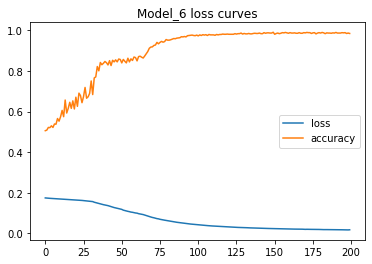

In [ ]:
# Plot Loss Curve
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves")


## Finding the Best learning rate
* A learning rate callback

In [ ]:
## Finding the best learning rate
# Set random eed
tf.random.set_seed(42)

# Create a model
model_9 =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])

# Compile the Model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# create a learning rate calback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the Model (passign lr_schedule callback)

history_9 = model_9.fit(X,
                        y,
                        epochs=100,
                        callbacks = lr_schedule)



Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7109 - accuracy: 0.4970 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.4570 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.4940 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.4960 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.4940 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.4910 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss:

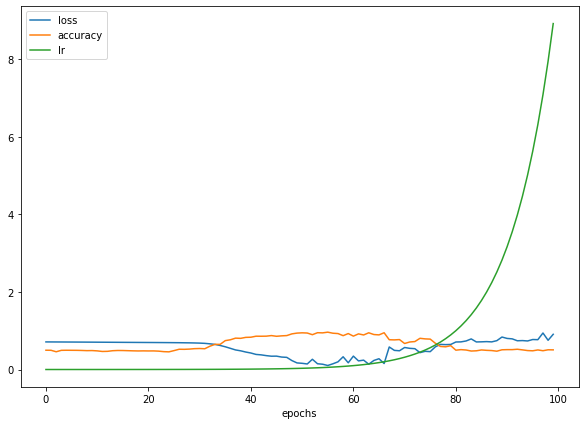

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

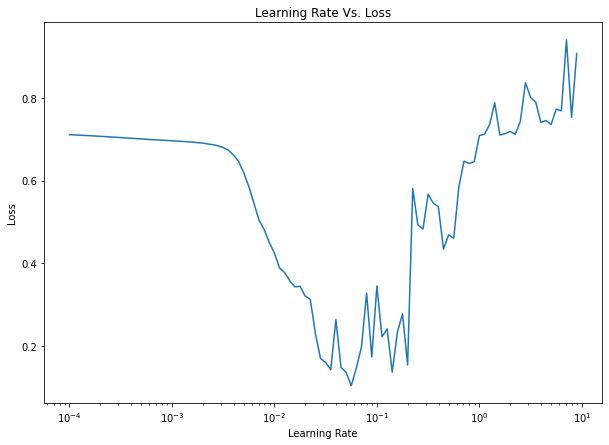

In [ ]:
# Plot the learnng rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Vs. Loss");

## Model with Higher Learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model with a non-linear activation

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

#3. Fit the model

history = model_10.fit(X,y, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.4970
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.4920
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.4860
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.4780
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.4660
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.4000
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.3500
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.3270
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.3220
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.3920
Epoch 11/20
32/32 [

## More classification Evaluation Methods
* Accuracy
* Precision
* Recall
* F1- Score
* Confusion Matrix
* Classification Report (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


In [ ]:
# Check accruracy of the Model
loss, accuracy = model_6.evaluate(X,y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")

32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9880
Model loss on the test set: 0.016977662220597267
Model accuracy on the test set:  98.80%


## Working with Multi-class classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the 1st training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

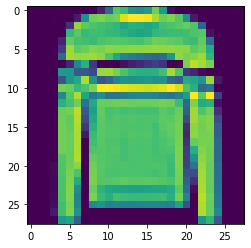

In [ ]:
# Plot single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[5])



In [ ]:
# check labels
train_labels[5]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

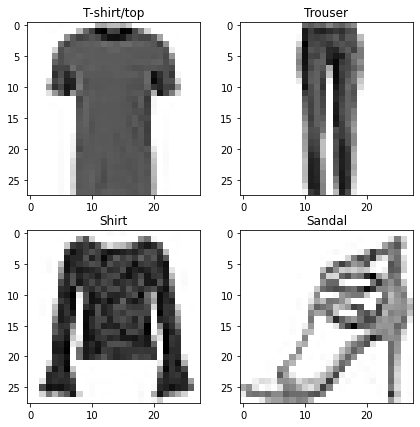

In [ ]:
# Plot and example image and its label
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis


## Building Multi-class classification.
  * Input Shape = 28 x 28
  * Output layer shape = 10
  * Loss function = tf.keras.losses.categoricalCrossenropy()
  * Output Layer activation = Softmax

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

# Compile the Model

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the Model
no_norm_history = model_11.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data,tf.one_hot(test_labels, depth = 10)))



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2617 - accuracy: 0.1930 - val_loss: 2.0201 - val_accuracy: 0.2000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8942 - accuracy: 0.1993 - val_loss: 1.8047 - val_accuracy: 0.2000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7872 - accuracy: 0.1993 - val_loss: 1.7547 - val_accuracy: 0.1994
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7546 - accuracy: 0.1975 - val_loss: 1.7368 - val_accuracy: 0.2001
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7352 - accuracy: 0.1985 - val_loss: 1.7254 - val_accuracy: 0.2000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7442 - accuracy: 0.1974 - val_loss: 1.7380 - val_accuracy: 0.1997
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7269 - accuracy: 0.1995 - val_loss: 1.7193 - val_accuracy:

In [ ]:
# Check Model Summary
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 4)                 3140      
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data

train_data.min(), train_data.max()


(0, 255)

In [ ]:
# We can get our training and testing data between 0 and 1 by didbing by the maximum

train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

In [ ]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

## Build Model with Normalized data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

# Compile the Model

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the Model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3722 - accuracy: 0.4891 - val_loss: 0.9935 - val_accuracy: 0.6220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9163 - accuracy: 0.6321 - val_loss: 0.8831 - val_accuracy: 0.6335
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8391 - accuracy: 0.6566 - val_loss: 0.8115 - val_accuracy: 0.6976
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7381 - accuracy: 0.7212 - val_loss: 0.7311 - val_accuracy: 0.7236
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6885 - accuracy: 0.7371 - val_loss: 0.6984 - val_accuracy: 0.7314
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6619 - accuracy: 0.7447 - val_loss: 0.6990 - val_accuracy: 0.7285
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6448 - accuracy: 0.7487 - val_loss: 0.6650 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

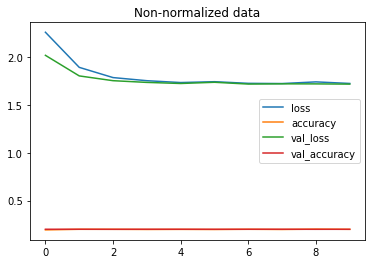

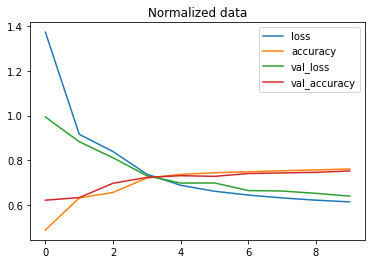

In [ ]:
import pandas as pd

# Plot non-normalizd data loss curves

pd.DataFrame(no_norm_history.history).plot(title = "Non-normalized data")

# Plot normalized data loss curves 

pd.DataFrame(norm_history.history).plot(title="Normalized data")



## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

# Compile the Model

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the Model
norm_history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm,test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3905 - accuracy: 0.5373 - val_loss: 1.0445 - val_accuracy: 0.7098 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8020 - accuracy: 0.7634 - val_loss: 0.7272 - val_accuracy: 0.7649 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6513 - accuracy: 0.7874 - val_loss: 0.6609 - val_accuracy: 0.7776 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6074 - accuracy: 0.7967 - val_loss: 0.6263 - val_accuracy: 0.7914 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5699 - accuracy: 0.8030 - val_loss: 0.5860 - val_accuracy: 0.7967 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5455 - accuracy: 0.8092 - val_loss: 0.6008 - val_accuracy: 0.7912 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

## lets refit a model with the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

# Compile the Model

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the Model
norm_history = model_14.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data_norm,test_labels)
                            )


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0604 - accuracy: 0.6106 - val_loss: 0.7528 - val_accuracy: 0.7303
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6880 - accuracy: 0.7548 - val_loss: 0.7005 - val_accuracy: 0.7538
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6520 - accuracy: 0.7671 - val_loss: 0.6759 - val_accuracy: 0.7622
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6357 - accuracy: 0.7755 - val_loss: 0.6615 - val_accuracy: 0.7668
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6258 - accuracy: 0.7773 - val_loss: 0.6516 - val_accuracy: 0.7714
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6172 - accuracy: 0.7813 - val_loss: 0.6701 - val_accuracy: 0.7664
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6119 - accuracy: 0.7850 - val_loss: 0.6626 - val_accuracy:

## Evaluating our multi-class classification model

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.50683690e-07, 1.05522471e-08, 5.87845022e-07, 5.84072201e-04,
        2.61820183e-04, 2.92880654e-01, 3.04046207e-05, 7.59426504e-02,
        2.62920130e-02, 6.04007661e-01],
       [6.05389301e-04, 6.19585373e-12, 7.12779284e-01, 7.86414546e-07,
        1.85998812e-01, 1.00666054e-16, 1.00607321e-01, 4.27310564e-37,
        8.38552569e-06, 2.85938413e-32],
       [4.82229749e-03, 9.86977577e-01, 2.47181606e-06, 8.14051926e-03,
        2.86789685e-07, 2.54862131e-10, 5.61317975e-05, 5.67517645e-07,
        1.51733737e-08, 1.46532813e-08],
       [2.40706955e-03, 9.89477873e-01, 3.56683785e-07, 8.10459536e-03,
        6.07091195e-08, 6.99403313e-11, 8.37886546e-06, 7.54050404e-07,
        2.51254253e-08, 8.82376639e-07],
       [1.38325125e-01, 3.17777049e-05, 1.28050059e-01, 2.91186105e-02,
        1.34186864e-01, 5.97345567e-12, 5.69611728e-01, 2.19022886e-21,
        6.75932504e-04, 4.93531233e-18]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.5068369e-07, 1.0552247e-08, 5.8784502e-07, 5.8407220e-04,
        2.6182018e-04, 2.9288065e-01, 3.0404621e-05, 7.5942650e-02,
        2.6292013e-02, 6.0400766e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the predictions probablites into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[737,   8,  22,  91,  15,   3, 113,   0,  11,   0],
       [ 14, 922,  11,  47,   1,   0,   4,   0,   1,   0],
       [ 22,   0, 644,  14, 202,   1, 111,   0,   6,   0],
       [ 34,  11,   5, 816,  33,   2,  80,   2,  12,   5],
       [  4,   0, 127,  39, 729,   0,  88,   0,  13,   0],
       [  0,   1,   0,   1,   0, 919,   0,  47,  11,  21],
       [150,   0, 130,  72, 257,   3, 378,   0,  10,   0],
       [  0,   0,   0,   0,   0,  53,   0, 902,   1,  44],
       [  1,   0,   6,  14,  55,  22,  13,   3, 882,   4],
       [  0,   0,   0,   3,   1,  21,   0,  40,   9, 926]])

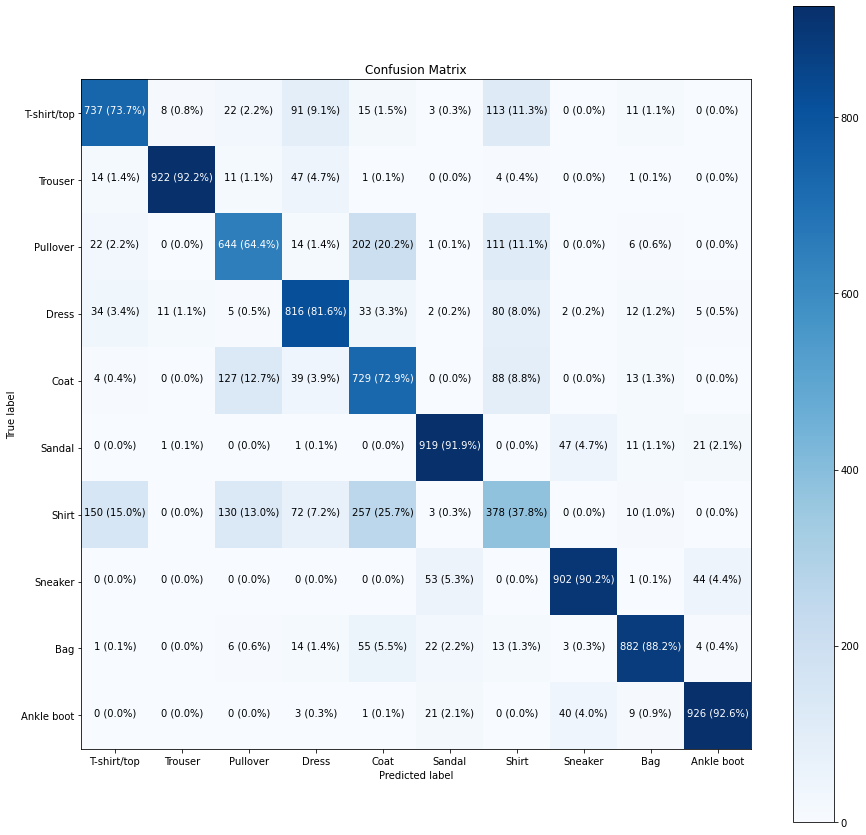

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## What patterns is our model learning

In [ ]:
# Find the layers of our most recent model

model_14.layers

In [ ]:
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights , weights.shape

(array([[-0.06954041, -0.20989878,  0.46348044, -0.88204473],
        [ 0.00351103, -0.37057918,  0.64986557, -0.47649762],
        [ 0.07436557,  1.1667134 ,  0.2649147 , -1.1051768 ],
        ...,
        [ 0.06641678, -0.14502351, -0.11830771, -0.47408596],
        [ 0.06227179,  0.03176645,  0.05846566, -0.04346232],
        [ 0.0249076 ,  0.33791065,  0.49708423, -0.29996124]],
       dtype=float32), (784, 4))

In [ ]:
## Model Summary
model_14.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


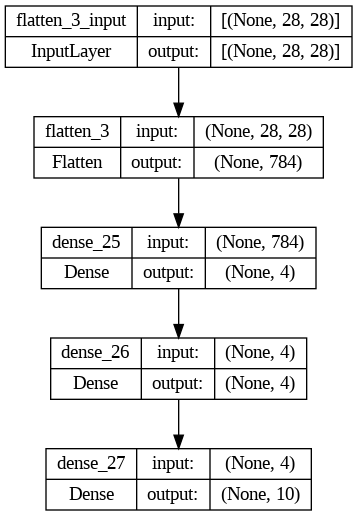

In [ ]:
# Let's check out another way of viewing Deep Learning Models
from tensorflow.keras.utils import plot_model

# See the inputs and Outputs of each Layer

plot_model(model_14, show_shapes=True)
